# Project Telco Customer Churning Analysis

Project Idea:

- Predict customer churn using classification techniques like logistic regression or random forests.
- Perform feature engineering to understand which customer attributes (e.g., contract length, payment method) influence churn the most.

---

## About the Dataset

The telecoms churn dataset contains information aboutcustomers of a telecom company and whether they churned (cancelled their service) or not. It includes various features such as scustomer ddemographics (age, gender, etc.) andservice usage data (number of calles, minutes, billing methods, etc.)


This dataset consist of 7043 examples of 21 features, and is commonly used in machine learning and data analysis as a benchmark for predicting customer churn. It can be used to develop models that can identify at-risk customersand take steps to prevent churn, potentially leading to increased customer retention and revenue for the company.

### About the Feature

---
* **customerID**: Customer ID
* **gender**: Whether the customer is a male or female
* **Senior Citizen**: Whether the customer is a senior citizen or not (1,0)
* **Partner**: Whether the customer has a partner or not (Yes, No)
* **Dependents**: Whether the customer has a dependents or not (Yes, No)
* **Tenure Months**: Number of months the customer has stayed with the company
* **Phonse Service**: Whether the customer has a Phonse Service or not (Yes, No)
* **Multiple Lines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
* **Internet Service**: Customer's internet service provider (DSL, Fiber optic, No)
* **Online Security**: Whether the customerhas online security or not (Yes, No, No internet service)
* **Online Backup**: Whether the customer has online backup (Yes, No, No internet service)
* **Device Protection**: Whether the customer has device protection or not (Yes, No, No internet service)
* **Tech Support**: Whether the customer has tech support or not (Yes, No, No internet service)
* **Streaming TV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
* **Streaming Movies**: Whether the customer has streaming movies or not (Yes, No, No internet service)
* **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
* **Paperless Billing**: Whether the customer has paperless or not (Yes, No)
* **Payment Method**: The customer's payment method (Electronic check, Mailed check, Bank Transfer (automatic), Credit card (automatic))
* **Monthly Charges**: The amount charged to the customer monthly
* **Total Charges**: The total amount charged to the customer
* **Churn Label**: Whether the customer churned or not (Yes, No)

### Initial Plan for Data Exploration

1. Data Overview
    * Load the dataset and review its structure
    * Identify key columns, including customer demographics and churn status

2. Descriptive Analysis
    * Obtain summary statistics for numeric columns
    * Visualize the churn distribution and identify trends

3. Categorical Analysis
    * Explore categorical variables
    * Analyze their impact on churn rates

4. Churn Reasons
    * Investigate reasons for churn
    * Understand the main drivers of customer attrition

5. Correlation Analysis

6. Hypotheis Testing
    * Hypothesis 1: Phone Service Impact Churn
    * Hypothesis 2: Contract Type Affects Churn
    * Hypothesis 3: Seniority Affects Churn

7. Suggests for the next steps in analyzing the data

8. Summary of quality of data

## Import necessary libraries

In [5]:
import os
import pandas as pd
from pandas import DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.contingency import chi2_contingency
from scipy.stats import normaltest, shapiro
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

import matplotlib

matplotlib.rcParams['axes.labelsize'] = 9
matplotlib.rcParams['legend.fontsize'] = 9
matplotlib.rcParams['ytick.labelsize'] = 9
matplotlib.rcParams['xtick.labelsize'] = 9
# plt.style.use('classic')

## Overview of the Data

In [17]:
# Read the data into pandas DataFrame

df = pd.read_csv('archive/Telco_customer_churn.csv')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [19]:
n_rows, n_columns = df.shape
print(f"Number of columns: {n_columns} columns \nNumber of rows: {n_rows} rows")

Number of columns: 33 columns 
Number of rows: 7043 rows


In [21]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

## Descriptive Analysis

**1. Total charge should be a float but it is showing as an object. Convert the data type from object to float**

In [24]:
total_charge = df['Total Charges']
missing = total_charge[~total_charge.str.replace('.','').str.isdigit()]
print('Number of missing total charge: ', len(missing))
missing

Number of missing total charge:  11


2234     
2438     
2568     
2667     
2856     
4331     
4687     
5104     
5719     
6772     
6840     
Name: Total Charges, dtype: object

As shown, the dataframe is missig values from the column total charge

In [26]:
# Convert the total charge column from object to float
df['Total Charges'] = df['Total Charges'].apply(pd.to_numeric, errors='coerce')

In [27]:
df['Total Charges'].dtype

dtype('float64')

**2. Displaying summary statistics of the numeric columns**

In [31]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [53]:
styled_df = (
    df.describe()
    .drop("count", axis = 0)
    .style.background_gradient(axis=0, cmap='magma')
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('background-color', 'k')]}])
    .set_caption("Summary Statistics")
)

styled_df

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
mean,1.000000,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.000000,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.000000,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.000000,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.000000,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.000000,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.000000,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


From the table above, total charge is showing as categorical which should be not be so. It is supposed to be numeric column.
Can be solved later.




**3. Analysis of numeric columns with barchart**``

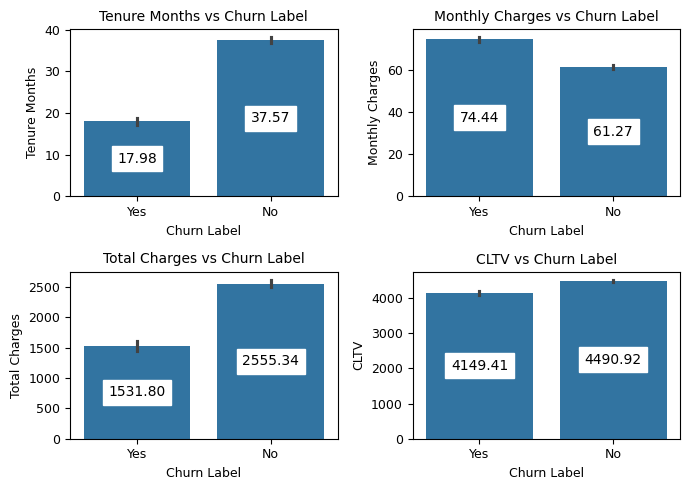

In [58]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.drop(
    ['Churn Value', 'Latitude', 'Longitude', 'Churn Score', 'Count', 'Zip Code'])

fig, axes = plt.subplots(2,2, figsize=(7,5))
axes = axes.flatten()
for i, column in enumerate(numeric_cols):
    ax = axes[i]
    sns.barplot(data=df, x='Churn Label', y=column, ax=ax, estimator=np.mean)
    ax.set_title(f'{column} vs Churn Label', fontsize=10)
    
    for k in ax.containers:
        ax.bar_label(
            k, fontsize=10, label_type='center', backgroundcolor='w', fmt='%.2f'
        )

fig.add_axes(axes[-1])
plt.tight_layout()
plt.show()